In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats

In [2]:
stats.norm.cdf(185,197.07,14.31)

0.19948390658154863

In [5]:
#Uses an x value, the mean of the data, and the standard deviation to get the % probability of being less than X. 
#Returns the probability truncated to two decimal places.
mean_data = 197.09
stdev_data = 14.31
x = 185
probability_of_x_less_than_185 = round((stats.norm.cdf(x,mean_data,stdev_data)*100),2) 
print("The probability of P(X<185) is",probability_of_x_less_than_185,"%.")

The probability of P(X<185) is 19.91 %.


In [14]:
#Imports the csv file from my Downloads folder
df = pd.read_csv(r"C:\Users\jdmun\Downloads\cost_estimation_hw1.csv", encoding = 'latin1')
df.head()

,Portfolio 1,Portfolio 2
0,6026455.0,8780510.0
1,3489269.0,8954696.0
2,1971498.0,5339542.0
3,114219.0,7122627.0
4,5824180.0,4658753.0


In [15]:
#Returns the descriptive statistics of the dataframe.
df.describe()

,Portfolio 1,Portfolio 2
count,2.000000e+01,2.000000e+01
mean,3.922176e+06,5.606001e+06
std,2.654118e+06,2.842836e+06
min,1.142190e+05,5.486800e+04
25%,1.674451e+06,4.004094e+06
50%,3.597064e+06,5.946886e+06
75%,6.046341e+06,8.020090e+06
max,8.139324e+06,9.980889e+06


In [17]:
#Returns the descriptive statistics of the dataframe, while removing the scientific notation for readability
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Portfolio 1,Portfolio 2
count,20.00000,20.00000
mean,3922175.80000,5606001.15000
std,2654118.48221,2842836.23390
min,114219.00000,54868.00000
25%,1674451.00000,4004093.50000
50%,3597064.50000,5946886.00000
75%,6046341.25000,8020090.50000
max,8139324.00000,9980889.00000


In [30]:
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

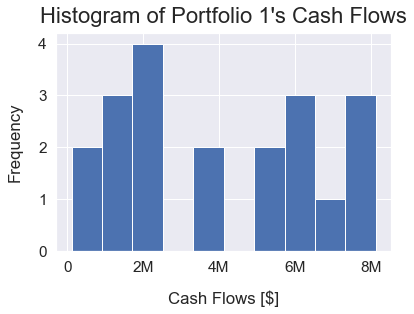

In [41]:
#Create a histogram of the cash flow's for Portfolio 1
plt.hist(df["Portfolio 1"])
#Adds the x axis label description
plt.xlabel("Cash Flows [$]", labelpad=16)
#Adds the y axis label description
plt.ylabel("Frequency", labelpad=16)
#Adds the table label description, placemement, and font size
plt.title("Histogram of Portfolio 1's Cash Flows", y=1.02, fontsize=22)
#Gets the current axis (GetCurrentAxis = GCA) for the figure
ax = plt.gca()
#Reformats the major ticks on the x axis
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

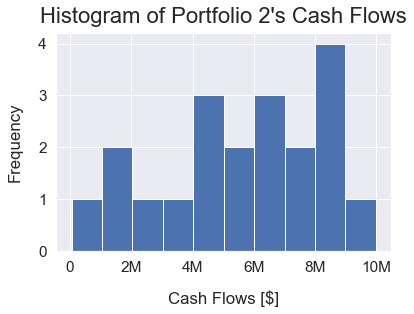

In [43]:
#Create a histogram of the cash flow's for Portfolio 2
plt.hist(df["Portfolio 2"])
#Adds the x axis label description
plt.xlabel("Cash Flows [$]", labelpad=16)
#Adds the y axis label description
plt.ylabel("Frequency", labelpad=16)
#Adds the table label description, placemement, and font size
plt.title("Histogram of Portfolio 2's Cash Flows", y=1.02, fontsize=22)
#Gets the current axis (GetCurrentAxis = GCA) for the figure
ax = plt.gca()
#Reformats the major ticks on the x axis
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

In [45]:
#Read excel file
df2 = pd.read_excel(r"C:\Users\jdmun\Downloads\cost_estimation_models_hw1_q2.xlsx", encoding = 'latin1')
df2.head()

,KLOC,Staff-Months
0,7,80
1,13,106
2,56,581
3,100,682
4,115,854


In [119]:
#Set up linear regression for model
from sklearn.linear_model import LinearRegression
x = df2.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
y = df2.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
regression_model = LinearRegression().fit(x,y)
#Makes predictions of what y would be based on x
y_pred = regression_model.predict(x)
#Returns the r-squared value for the regression model
r_sq = regression_model.score(x,y)
#display adjusted R-squared
adjusted_r_sq = 1 - (1-regression_model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
#Finds the y-intercept (beta zero) for the regression model
intercept = regression_model.intercept_
#Returns the x(i) coefficients for the regression model
coefficients = regression_model.coef_


In [121]:
print("The regression equation for this model is: KLOC =", intercept, "+", coefficients,"Staff-Months")
print("R-Squared =", round(r_sq * 100,2), "%")
print("Adjusted R-Squared =", round(adjusted_r_sq * 100,2), "%")

The regression equation for this model is: KLOC = [-19.26982988] + [[0.19328161]] Staff-Months
R-Squared = 80.7 %
Adjusted R-Squared = 75.88 %


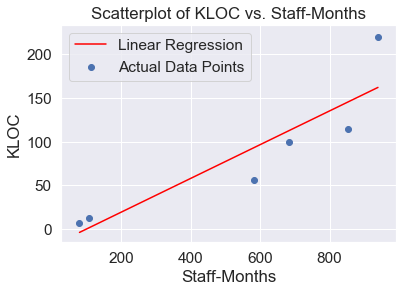

In [89]:
#Visualizations for linear regression model
plt.plot(x,y_pred, label = 'Linear Regression', color='red')
plt.scatter(x,y, label = 'Actual Data Points')
plt.xlabel('Staff-Months')
plt.ylabel('KLOC')
plt.title('Scatterplot of KLOC vs. Staff-Months')
plt.legend()
plt.show()

In [111]:
#Predict number of staff-months required to develop 70 KLOC
(70 - (intercept))/coefficients

array([[461.86406419]])

In [ ]:
#Let's make this simpler using statsmodel.api
#Figure out statsmodel.api later
#Also, need to check if assumptions are valid in general.